In [268]:
from torchvision import models
import numpy as np
import cv2
import PIL
import os

In [269]:
import warnings
warnings.filterwarnings("ignore")
from pytorch_grad_cam import GradCAM,GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image,preprocess_image

In [270]:
# Load a pre-trained deep learning model
model = models.vgg16(pretrained=True)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [271]:
# fix target class label (of the Imagenet class of interest!)
# 1: goldfish, 250: Siberian Husky, 947: mushroom

# targets = [ClassifierOutputTarget(0)]

In [272]:
# fix the target layer (after which we'd like to generate the CAM)
# 修正目标层（我们想要生成 CAM 的层之后的那一层）
target_layers = [model.features[-1]]
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [273]:
# instantiate the model
cam = GradCAM(model=model, target_layers=target_layers) # use GradCamPlusPlus class

In [274]:
# Preprocess input image, get the input image tensor
# img = np.array(PIL.Image.open('/Users/xxxyy/PycharmProjects/UoB/visulisation/video_image_temp/7.png'))
# img = cv2.resize(img, (300,300))
# img = np.float32(img) / 255
# input_tensor = preprocess_image(img)

# Preprocess input image, get the input image tensor
# load the image
image = PIL.Image.open('/Users/xxxyy/PycharmProjects/UoB/visulisation/video_image_temp/7.png')

# resize the image
resized_image = image.resize((224, 224))

# transform to numpy array
img = np.array(resized_image)

# normalisation
img = np.float32(img) / 255

input_tensor = preprocess_image(img)
print(input_tensor.shape)

torch.Size([1, 3, 224, 224])


In [275]:
# generate CAM
grayscale_cams = cam(input_tensor=input_tensor, targets=None)
cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)

In [276]:
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])

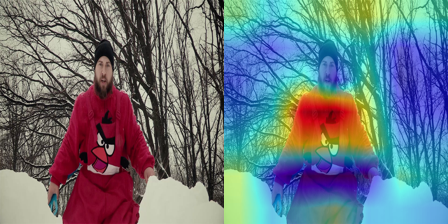

In [277]:
# display the original image & the associated CAM
images = np.hstack((np.uint8(255*img), cam_image))
PIL.Image.fromarray(images)

In [278]:
# Generate save path
save_folder = '/Users/xxxyy/PycharmProjects/UoB/visulisation/vgg/class_activation_map'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, f'GAM.png')

In [279]:
# Convert numpy arrays to PIL image objects
image_pil = PIL.Image.fromarray(images)

In [280]:
# save image
image_pil.save(save_path)